<H1>Random inhibitory networks</H1>

In [1]:
# load necessary modules
%pylab inline
import numpy as np

from itertools import combinations
from scipy.stats import skew
from scipy.stats import kurtosis

from inet.patterns import randpattern, similarity
from inet.patterns import separation
from inet.plots import separation_plot

Populating the interactive namespace from numpy and matplotlib


<H2>Exmaple with one single pattern in GC</H2>

Activity in GC network is 10%

In [2]:
GC = randpattern(size = 1000, prob = 0.1) # vector of GC activities
GC.size, np.count_nonzero(GC)

(1000, 100)

P(GC-PC) chemical synapse = 0.09. That means, that all PV cells are inervated by GC cells. If ratio GC to PV is 100, every GC will project to 9 out of 100 PVs, but there are 100X more GCs, therefore all PV will be inervated. The circuit must be convergent.

In [3]:
PEI =  0.0857142857143
PEI*1000

85.71428571429999

P(PV-GC) chemical synapse = 0.248571428571. That means, that one PV inhibit ~ 25% of GC cells. For 10^6 GC cells, that would be that 250,000 cells are inhibited by one PV!

In [4]:
PIE = 0.248571428571
PIE*1000 # number of total GC cells (from 1000) inhibitied by all PVs

248.571428571

Let's now remove randomly active neurons in the GC network from active PV neurons

In [5]:
GCout = GC.copy()
# random divergence, otherwise replace=True
GCout[np.random.choice(a=range(1000), size=int(PIE*1000), replace=False)]=0

In [12]:
# note that on average, 25% of the active cells will be inhibited, thus, similarty will 
# be reduced from 1 to ~0.75
np.count_nonzero(GC), np.count_nonzero(GCout)

(100, 72)

In [10]:
GCout.size

1000

In [11]:
similarity(GC, GCout)

0.84852813742385724

<H2> Inhibitory motifs</H2>
Load inhibitory reciprocal networks with average connectivity between inhibitory neurons of 0.28

P(PV-PV) chemical synapse = 0.285714285714

<H3> Inhibitory network without connectivity motifs</H3>

Connection probability = 0.28
Variance = 0.20
Skew = 0.98
Kurtosis = -1.04


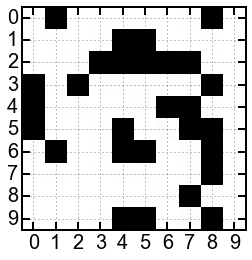

In [13]:
W = np.loadtxt('w_10_0.280_0.000_0.000_0.000_0.000_0.dat', dtype=int).T # pre, post
plt.imshow(W, cmap='binary',  interpolation='None');
  
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid(True)
print('Connection probability = {:2.2f}'.format(np.mean(W)))
print('Variance = {:2.2f}'.format(np.var(W)))
print('Skew = {:2.2f}'.format(skew(W.flatten())))
print('Kurtosis = {:2.2f}'.format(kurtosis(W.flatten())))

In [14]:
# get the GC activity after pass from interneuron

I_random = np.sum(W, axis=1)
print(I_random)
print('Mean  = {:2.2f}'.format(I_random.mean()))
print('Variance = {:2.2f}'.format(I_random.var()))
print('Skew = {:2.2f}'.format(skew(I_random)))
print('Kurtosis = {:2.2f}'.format(kurtosis(I_random)))

[2 2 5 3 3 4 4 1 1 3]
Mean  = 2.80
Variance = 1.56
Skew = 0.07
Kurtosis = -0.97


In [15]:
# activation function (fires if receives less than 2 inputs)
I_out = np.zeros(I_random.size, dtype=int)
I_out[I_random<=2]=1
print(I_random)
print(I_out)
print('Number of active inhibitory neurons {}'.format(np.count_nonzero(I_out)))

[2 2 5 3 3 4 4 1 1 3]
[1 1 0 0 0 0 0 1 1 0]
Number of active inhibitory neurons 4


In [16]:
# every cells inhibits 25 GC cells
GCout = GC.copy()
for _ in range(np.count_nonzero(I_out)):
    GCout[np.random.choice(a=range(1000), size=int(PIE*100), replace=False)]=0
                           
np.count_nonzero(GC), np.count_nonzero(GCout) # must be similar to random

(100, 92)

In [17]:
similarity(GC, GCout)

0.95916630466254404

<H3>Inhibitory network with bidirectional connection motifs</H3>

Connection probability = 0.31
Variance = 0.21
Skew = 0.82
Kurtosis = -1.32


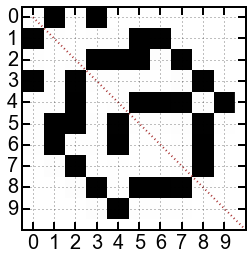

In [18]:
W_rec = np.loadtxt('w_10_0.280_2.500_0.000_0.000_0.000_0.dat', dtype=int).T # pre, post
plt.imshow(W_rec, cmap='binary',  interpolation='None');
  
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid(True)
plt.plot(np.linspace(0,10,100),np.linspace(0,10,100), ':', color='brown')
print('Connection probability = {:2.2f}'.format(np.mean(W_rec)))
print('Variance = {:2.2f}'.format(np.var(W_rec)))
print('Skew = {:2.2f}'.format(skew(W_rec.flatten())))
print('Kurtosis = {:2.2f}'.format(kurtosis(W_rec.flatten())))

In [19]:
# get the GC activity after pass from interneuron

I_rec = np.sum(W_rec, axis=1)
print(I_rec)
print('Mean  = {:2.2f}'.format(I_rec.mean()))
print('Variance = {:2.2f}'.format(I_rec.var()))
print('Skew = {:2.2f}'.format(skew(I_rec)))
print('Kurtosis = {:2.2f}'.format(kurtosis(I_rec)))

[2 3 4 3 5 4 3 2 4 1]
Mean  = 3.10
Variance = 1.29
Skew = -0.20
Kurtosis = -0.75


In [20]:
# activation function (fires if receives less than 2 inputs)
I_out = np.zeros(I_rec.size, dtype=int)
I_out[I_rec<=2]=1
print(I_rec)
print(I_out)
print('Number of active inhibitory neurons {}'.format(np.count_nonzero(I_out)))

[2 3 4 3 5 4 3 2 4 1]
[1 0 0 0 0 0 0 1 0 1]
Number of active inhibitory neurons 3


In [21]:
#lets get know inhibition from that network
GCout = GC.copy()
# random divergence, otherwise replace=True
for i in range(np.count_nonzero(I_out)):
    GCout[np.random.choice(a=range(1000), size=int(PIE*100), replace=False)]=0

In [22]:
similarity(GC, GCout)

0.96953597148326576

<H2> A list of random patterns</H2>
<P> We create 3600 random patterns of size = 10000</P>

In [23]:
# generate all possible probability combinations between 10% and 90% without repetition
# n! / r! / (n-r)! , if we generate n = 9, r = 2 ==> 36 combinations
#prob = [i for i in combinations(np.arange(0.1, 1.0, 0.05),2)]
prob = [i for i in combinations(np.arange(0.1, 1.0, 0.1),2)]

nGC = 10000
inputpatterns = list()
for i,j in prob:
    
    inputpatterns  += [(randpattern(nGC, i), randpattern(nGC,j)) for _ in range(100)]

len(inputpatterns) # mustbe 3600

3600

In [24]:
# Plot initial similarities
separation(inputpatterns, inputpatterns)


{'percentage_max': 0.0, 'proportion': 0.0}

Max similarity = 0.85, Min similarity = 0.12


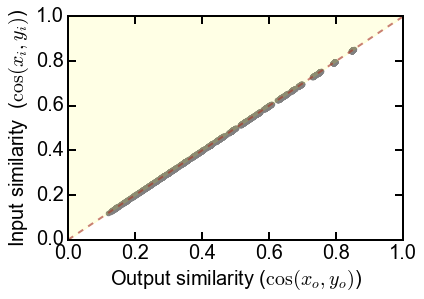

In [25]:
sim_max = np.max(separation.insimilarity)
sim_min = np.min(separation.insimilarity)
print('Max similarity = {:2.2}, Min similarity = {:2.2}'.format(sim_max, sim_min))
separation_plot(separation.insimilarity, separation.outsimilarity)

Load random inhibitory network

In [42]:
def inhibition(inputpattern, inhibitory_pattern):
    """
    Computes the inhibition on the input pattern and returns the resulting pattern
    
    inputpattern:  array
                   this is the vector of input activities (e.g. from GCs)
        
    inhibitory_pattern: array
                   this is the vector of inhibitory firings (i.e. after activation)
    """
    outvect = inputpattern.copy()
    i_active = np.count_nonzero(inhibitory_pattern)
    
    # random divergence, otherwise replace=True
    for i in range(i_active):
        outvect[np.random.choice(a=range(nGC), size=int(PIE*100), replace=False)]=0
        
    return(outvect)

<H3>Load RANDOM inhibitory networks</H3>

Connection probability = 0.28
Variance = 0.20
Skew = 0.97
Kurtosis = -1.05


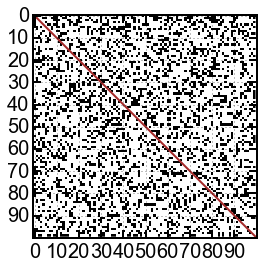

In [43]:
W_rec = np.loadtxt('w_100_0.280_0.000_0.000_0.000_0.000_0.dat', dtype=int).T # pre, post
plt.imshow(W_rec, cmap='binary',  interpolation='None');
  
plt.xticks(range(0,100,10)), plt.yticks(range(0,100, 10))
plt.grid(True)
plt.plot(np.linspace(0,100,100),np.linspace(0,100,100), '-', color='brown')
print('Connection probability = {:2.2f}'.format(np.mean(W_rec)))
print('Variance = {:2.2f}'.format(np.var(W_rec)))
print('Skew = {:2.2f}'.format(skew(W_rec.flatten())))
print('Kurtosis = {:2.2f}'.format(kurtosis(W_rec.flatten())))

In [44]:
I_rec = np.sum(W_rec, axis=1)
# activation function (fires if receives less than 2 inputs)
I_out = np.zeros(I_rec.size, dtype=int)
I_out[I_rec<=I_rec.mean()]=1
print(I_rec)
print(I_out)
print('Number of active inhibitory neurons {}'.format(np.count_nonzero(I_out)))

[27 36 29 30 32 35 37 29 31 24 24 30 24 31 16 33 31 32 31 27 25 33 30 21 29
 32 26 36 24 27 24 32 32 24 31 36 32 28 28 36 29 29 29 30 31 26 31 30 20 35
 26 22 28 25 31 30 23 29 22 24 32 31 22 29 29 23 23 25 30 20 23 32 26 30 26
 21 31 28 31 28 33 34 31 28 29 27 23 29 22 18 27 29 31 28 19 33 21 30 25 30]
[1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0]
Number of active inhibitory neurons 45


Compute similarity


In [46]:
outputpatterns  = [(inhibition(x, I_out), inhibition(y, I_out)) for x,y in inputpatterns]

In [47]:
separation(inputpatterns, outputpatterns)

{'percentage_max': 4.664954720006234, 'proportion': 1.0}

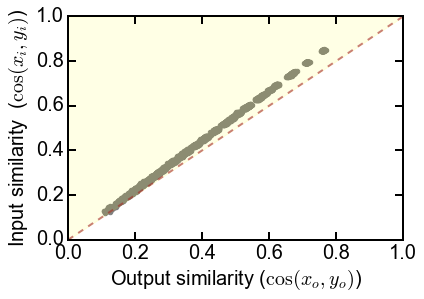

In [48]:
separation_plot(separation.insimilarity, separation.outsimilarity)

<H3>Load inhibitory network with connectivity motifs</H3>

Connection probability = 0.28
Variance = 0.20
Skew = 0.96
Kurtosis = -1.08


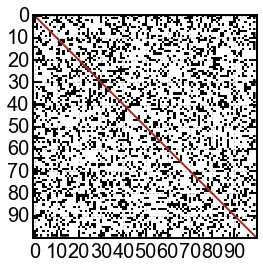

In [49]:
W_rec = np.loadtxt('w_100_0.280_2.500_0.000_0.000_0.000_0.dat', dtype=int).T # pre, post
plt.imshow(W_rec, cmap='binary',  interpolation='None');
  
plt.xticks(range(0,100,10)), plt.yticks(range(0,100, 10))
plt.grid(True)
plt.plot(np.linspace(0,100,100),np.linspace(0,100,100), '-', color='brown')
print('Connection probability = {:2.2f}'.format(np.mean(W_rec)))
print('Variance = {:2.2f}'.format(np.var(W_rec)))
print('Skew = {:2.2f}'.format(skew(W_rec.flatten())))
print('Kurtosis = {:2.2f}'.format(kurtosis(W_rec.flatten())))

In [50]:
I_rec = np.sum(W_rec, axis=1)
# activation function (fires if receives less than 2 inputs)
I_out = np.zeros(I_rec.size, dtype=int)
I_out[I_rec<=I_rec.mean()]=1
print(I_rec)
print(I_out)
print('Number of active inhibitory neurons {}'.format(np.count_nonzero(I_out)))

[29 37 23 30 30 29 29 29 28 25 25 40 35 30 26 33 31 30 21 23 31 27 29 23 29
 38 26 35 18 27 29 32 31 25 28 35 34 31 32 39 32 31 34 28 22 22 25 30 25 21
 26 27 28 21 31 31 29 34 20 26 36 29 18 28 28 24 18 35 23 25 24 34 29 27 38
 27 34 27 33 30 29 33 27 29 31 32 26 30 19 21 31 29 26 25 26 31 22 21 23 32]
[0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0]
Number of active inhibitory neurons 47


In [51]:
outputpatterns  = [(inhibition(x, I_out), inhibition(y, I_out)) for x,y in inputpatterns]

In [52]:
separation(inputpatterns, outputpatterns)

{'percentage_max': 4.8602384751504548, 'proportion': 1.0}

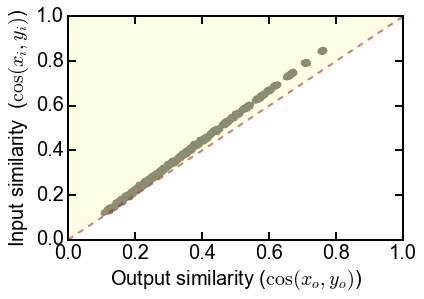

In [53]:
separation_plot(separation.insimilarity, separation.outsimilarity)